# Import Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Import Dataset

In [2]:
df = pd.read_csv('Resume_Data.csv')

# Exploratory Data Analysis

In [3]:
# Preview the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data distribution summary
print(df.describe(include='all'))

              Role                                             Skills
0  Account Manager  Client management, CRM software, negotiation, ...
1  Account Manager  Client management, CRM software, negotiation, ...
2  Account Manager  Client management, CRM software, negotiation, ...
3  Account Manager  Client management, CRM software, negotiation, ...
4  Account Manager  Client management, CRM software, negotiation, ...
Role      0
Skills    0
dtype: int64
                   Role                                             Skills
count               895                                                895
unique               20                                                 20
top     Account Manager  Client management, CRM software, negotiation, ...
freq                 50                                                 50


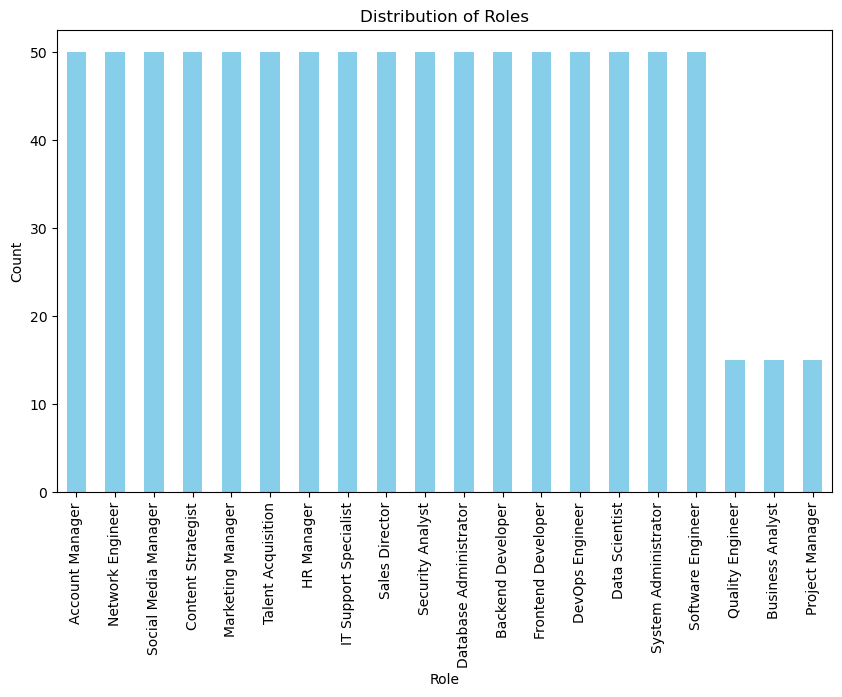

In [4]:
# Plot 1: Bar plot of Role distribution
plt.figure(figsize=(10,6))
df['Role'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

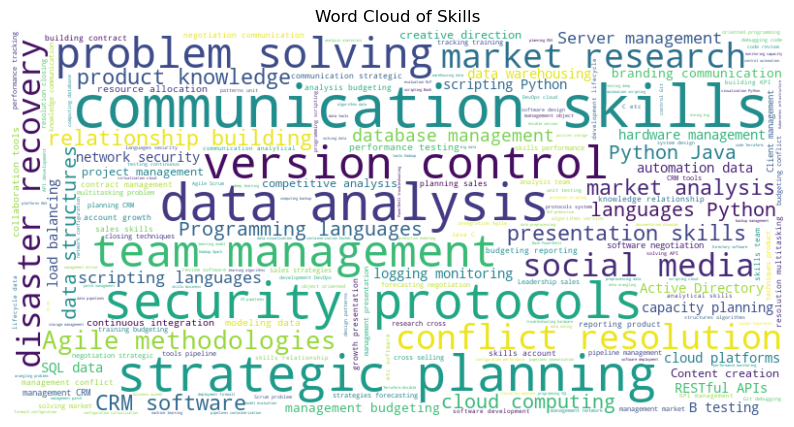

In [5]:
# Plot 2: Word cloud of Skills
from wordcloud import WordCloud

skills_text = ' '.join(df['Skills'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills')
plt.show()

# Data Processing

In [6]:
# Split the data into input features and target labels
X = df['Skills']
y = df['Role']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

# Transform skills into numerical features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model Training

In [7]:
# Create and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

In [8]:
# Predict using the test dataset
y_pred = model.predict(X_test_tfidf)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
                        precision    recall  f1-score   support

       Account Manager       1.00      1.00      1.00        10
     Backend Developer       1.00      1.00      1.00        10
      Business Analyst       1.00      1.00      1.00         3
    Content Strategist       1.00      1.00      1.00        10
        Data Scientist       1.00      1.00      1.00        10
Database Administrator       1.00      1.00      1.00        10
       DevOps Engineer       1.00      1.00      1.00        10
    Frontend Developer       1.00      1.00      1.00        10
            HR Manager       1.00      1.00      1.00        10
 IT Support Specialist       1.00      1.00      1.00        10
     Marketing Manager       1.00      1.00      1.00        10
      Network Engineer       1.00      1.00      1.00        10
       Project Manager       1.00      1.00      1.00         3
      Quality Engineer       1.00      1.00      1.00         3
  

# Save Model (Pickle File)

In [9]:
import pickle

# Save the model and the TF-IDF vectorizer
model_path = 'resume_analysis_model.pkl'
vectorizer_path = 'tfidf_vectorizer.pkl'

# Saving the model
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

# Saving the vectorizer
with open(vectorizer_path, 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

print(f"Model and vectorizer saved as '{model_path}' and '{vectorizer_path}' respectively.")

# Load the model and the TF-IDF vectorizer
with open(model_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open(vectorizer_path, 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

print("Model and vectorizer loaded successfully.")

# Example usage
test_resumes = ["Proficient in Python, SQL, and data visualization with experience in machine learning algorithms."]
transformed_resumes = loaded_vectorizer.transform(test_resumes)
predictions = loaded_model.predict(transformed_resumes)
print("Predicted roles for test resumes:", predictions)

Model and vectorizer saved as 'resume_analysis_model.pkl' and 'tfidf_vectorizer.pkl' respectively.
Model and vectorizer loaded successfully.
Predicted roles for test resumes: ['Data Scientist']
